In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


In [15]:
df=pd.read_csv('../Dataset/geopolitical_instability_middle_east.csv', sep=',')
df

,Conflict_ID,Region,Conflict_Type,Start_Date,End_Date,Number_of_Incidents,Number_of_Deaths,Intervention_ID,Intervention_Country,Intervention_Organization,...,Government_Transparency,Number_of_Scandals,Number_of_Displaced_People,Number_of_Refugees,Humanitarian_Needs,Access_to_Humanitarian_Aid,Technology_Use_in_Conflicts,Technological_Investment,Number_of_Data_Analysis_Projects,Data_Analysis_Effectiveness
0,1,Afghanistan,terrorism,2010-01-01,NaN,48,820,1,Iraq,Red Cross,...,8,6,1097330,973012,medicine,high,low,40,12,7
1,2,Afghanistan,civil war,2010-01-02,2023-01-01,18,284,2,Afghanistan,Red Cross,...,7,2,4064229,1822404,shelter,low,medium,71,48,2
2,3,Iran,terrorism,2010-01-03,2023-01-01,55,29,3,Yemen,UN,...,2,4,1308294,1392299,shelter,medium,high,42,4,1
3,4,Iran,territorial conflict,2010-01-04,2023-01-01,14,458,4,Afghanistan,Red Cross,...,4,6,92928,878925,medicine,medium,medium,18,30,4
4,5,Iraq,terrorism,2010-01-05,2023-01-01,34,935,5,Iraq,Red Cross,...,4,5,3494593,1090382,water,medium,low,76,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Syria,terrorism,2037-05-14,NaN,63,757,9996,Iraq,UN,...,1,9,938855,534834,shelter,low,high,80,47,7
9996,9997,Iran,terrorism,2037-05-15,NaN,95,45,9997,Iran,UN,...,2,1,3445901,2273746,water,low,medium,57,31,2
9997,9998,Afghanistan,territorial conflict,2037-05-16,NaN,98,121,9998,Yemen,Red Cross,...,6,5,4246780,1884898,food,medium,medium,91,1,9
9998,9999,Syria,territorial conflict,2037-05-17,NaN,38,713,9999,Afghanistan,UN,...,1,4,946595,414533,water,low,medium,9,13,8


In [16]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'])

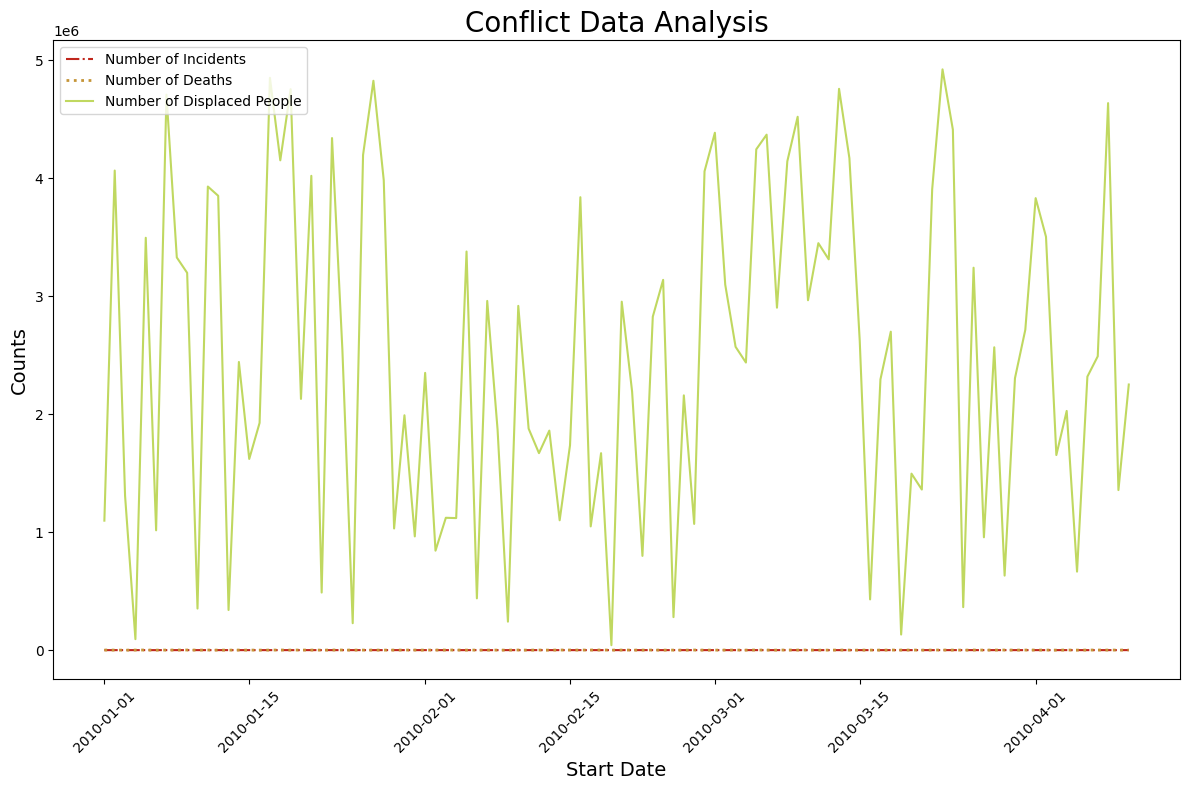

In [17]:
df_subset = df.head(100)

plt.figure(figsize=(12, 8))
plt.plot(df_subset['Start_Date'], df_subset['Number_of_Incidents'], label='Number of Incidents', color='#c0261c', linewidth=1.5, linestyle='-.')
plt.plot(df_subset['Start_Date'], df_subset['Number_of_Deaths'], label='Number of Deaths', color='#c59538', linewidth=2, linestyle=':')
plt.plot(df_subset['Start_Date'], df_subset['Number_of_Displaced_People'], label='Number of Displaced People', color='#c0d860')
plt.xlabel('Start Date', size=14)
plt.ylabel('Counts', size=14)
plt.title('Conflict Data Analysis', size=20)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribución de Conflictos por Región:
Un gráfico de barras para mostrar la cantidad de conflictos en cada región.

In [1]:
plt.figure(figsize=(12, 8))
df['Region'].value_counts().plot(kind='bar', color='#c0261c')
plt.xlabel('Region', size=14)
plt.ylabel('Number of Conflicts', size=14)
plt.title('Distribution of Conflicts by Region', size=20)
plt.show()


NameError: name 'plt' is not defined

Tipos de Conflictos a lo Largo del Tiempo:
Un gráfico de líneas o un gráfico apilado para mostrar cómo los tipos de conflictos cambian con el tiempo.

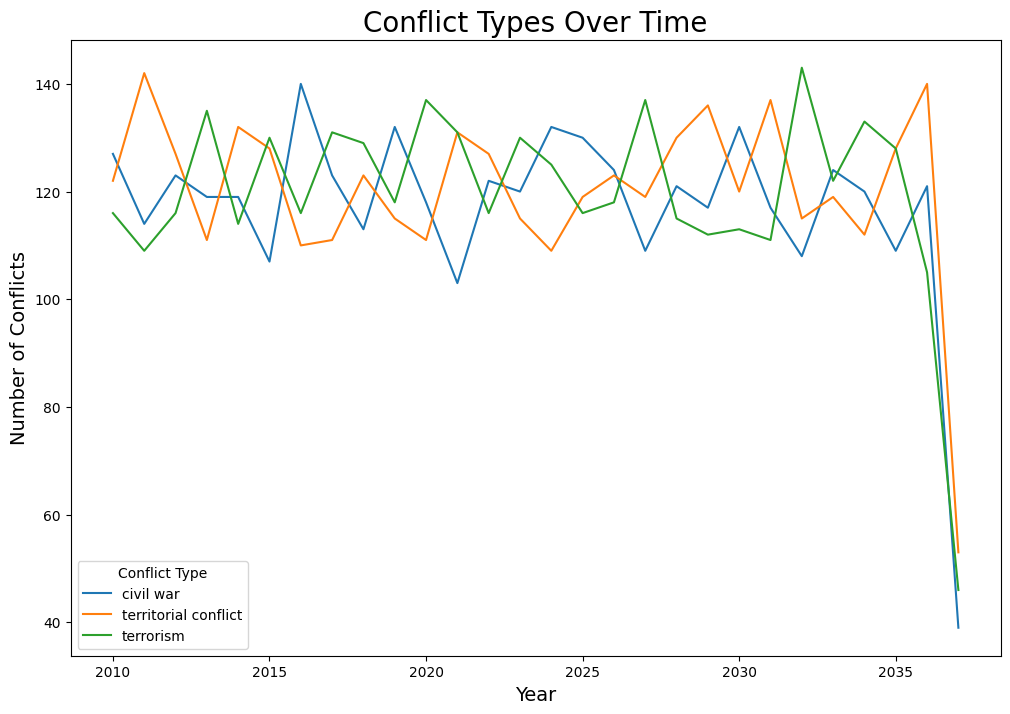

In [19]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
conflict_types_over_time = df.groupby([df['Start_Date'].dt.year, 'Conflict_Type']).size().unstack().fillna(0)
conflict_types_over_time.plot(kind='line', figsize=(12, 8))
plt.xlabel('Year', size=14)
plt.ylabel('Number of Conflicts', size=14)
plt.title('Conflict Types Over Time', size=20)
plt.legend(title='Conflict Type')
plt.show()


Número de Muertes por Región:
Un gráfico de barras para comparar el número total de muertes en diferentes regiones.

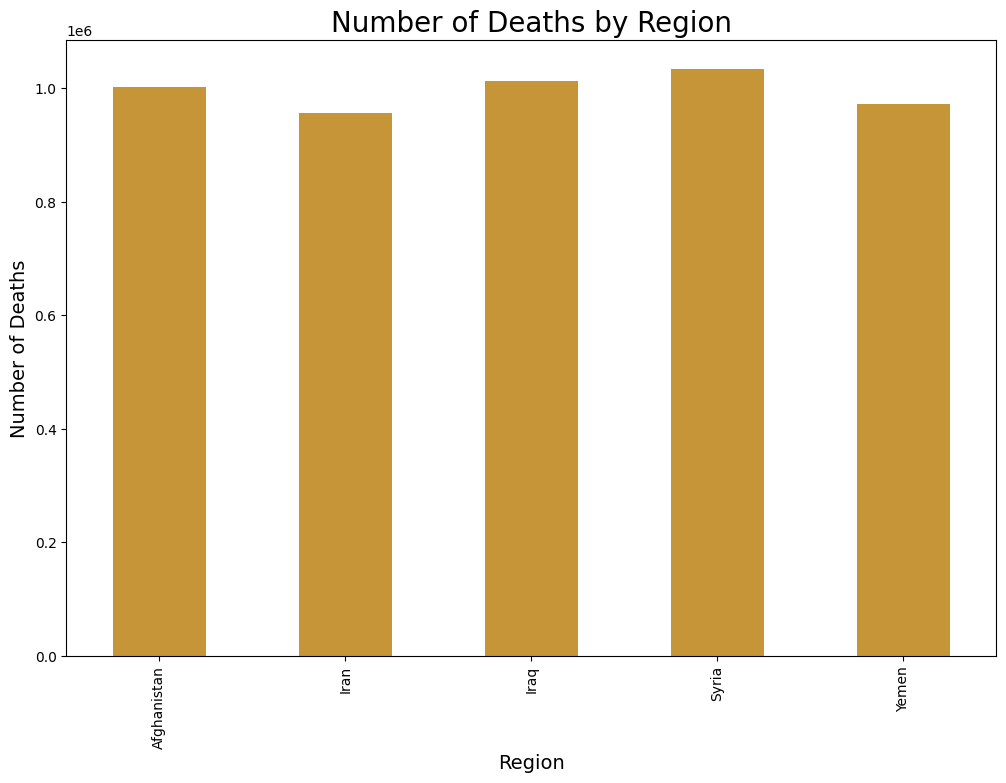

In [20]:
deaths_by_region = df.groupby('Region')['Number_of_Deaths'].sum()
plt.figure(figsize=(12, 8))
deaths_by_region.plot(kind='bar', color='#c59538')
plt.xlabel('Region', size=14)
plt.ylabel('Number of Deaths', size=14)
plt.title('Number of Deaths by Region', size=20)
plt.show()


Intervenciones por Organización:
Un gráfico de barras para mostrar cuántas intervenciones han sido realizadas por cada organización.

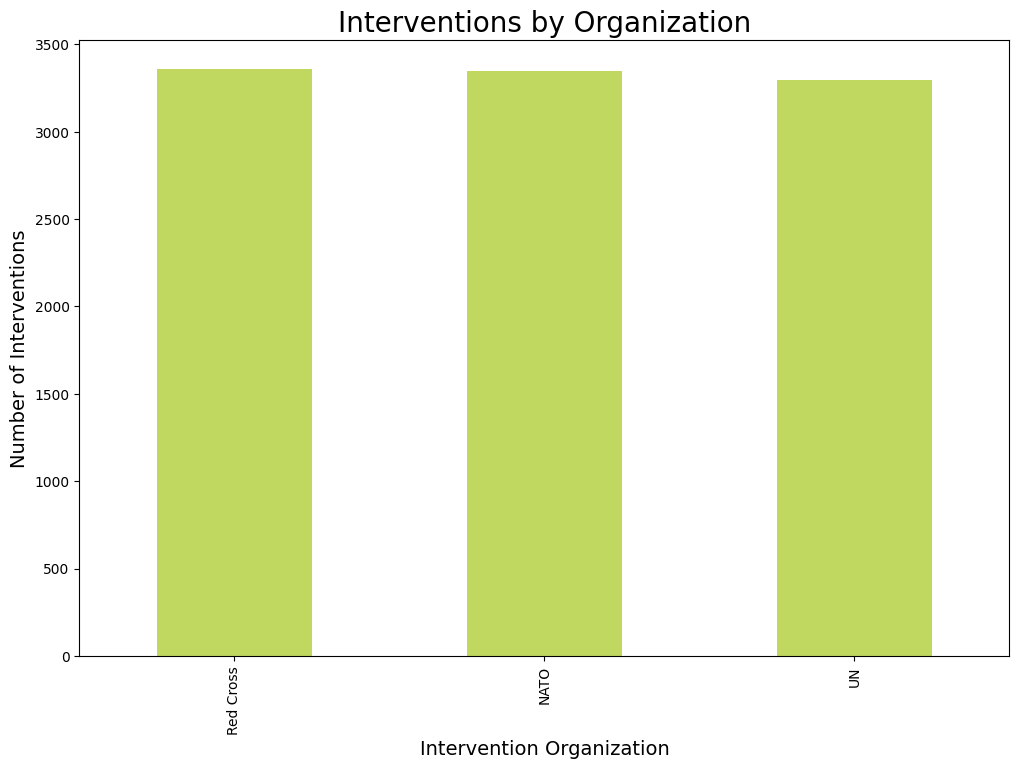

In [21]:
plt.figure(figsize=(12, 8))
df['Intervention_Organization'].value_counts().plot(kind='bar', color='#c0d860')
plt.xlabel('Intervention Organization', size=14)
plt.ylabel('Number of Interventions', size=14)
plt.title('Interventions by Organization', size=20)
plt.show()


Transparencia del Gobierno vs. Número de Escándalos:
Un gráfico de dispersión para explorar la relación entre la transparencia del gobierno y el número de escándalos.

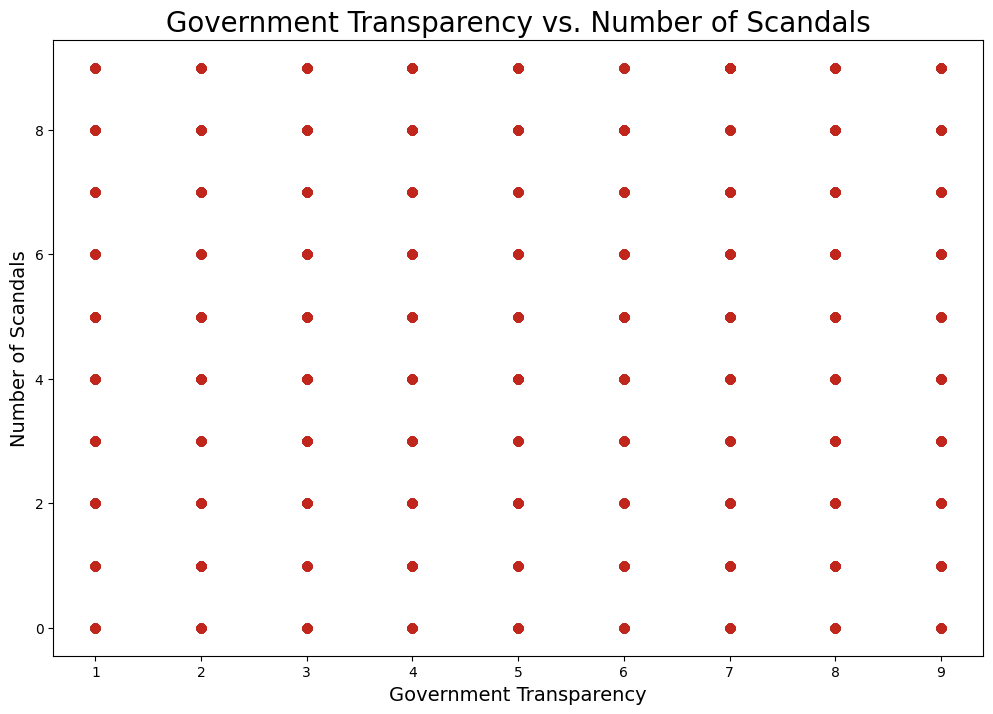

In [22]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Government_Transparency'], df['Number_of_Scandals'], color='#c0261c')
plt.xlabel('Government Transparency', size=14)
plt.ylabel('Number of Scandals', size=14)
plt.title('Government Transparency vs. Number of Scandals', size=20)
plt.show()


Acceso a Ayuda Humanitaria a lo Largo del Tiempo:
Un gráfico de líneas para mostrar cómo ha cambiado el acceso a la ayuda humanitaria con el tiempo.

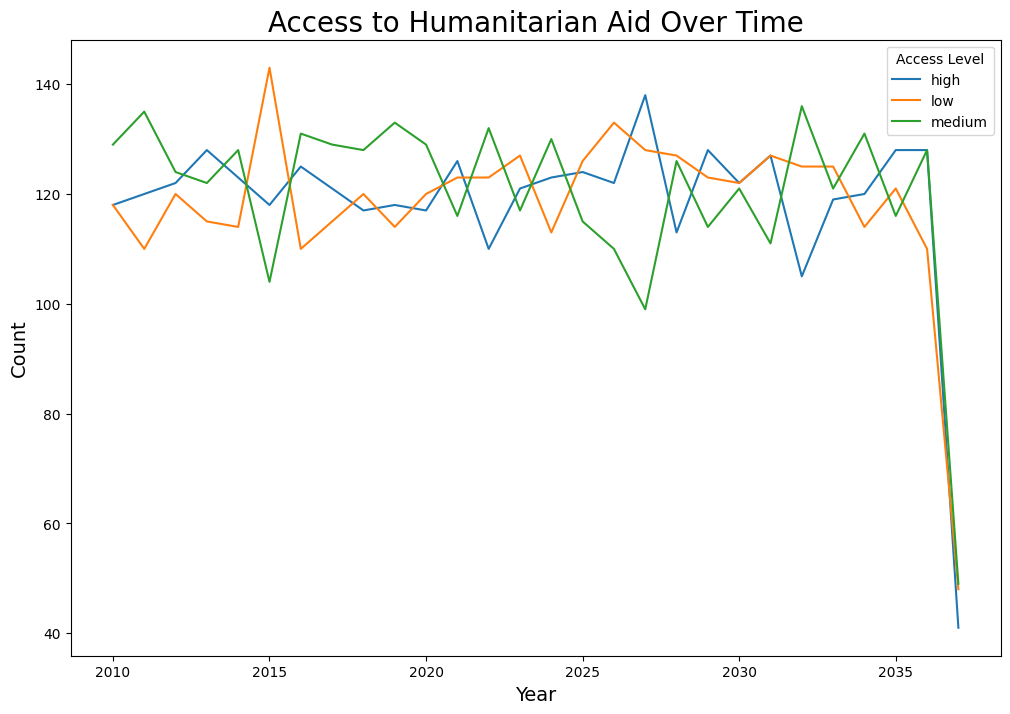

In [23]:
humanitarian_aid_over_time = df.groupby(df['Start_Date'].dt.year)['Access_to_Humanitarian_Aid'].value_counts().unstack().fillna(0)
humanitarian_aid_over_time.plot(kind='line', figsize=(12, 8))
plt.xlabel('Year', size=14)
plt.ylabel('Count', size=14)
plt.title('Access to Humanitarian Aid Over Time', size=20)
plt.legend(title='Access Level')
plt.show()


Uso de Tecnología en Conflictos:
Un gráfico de barras para mostrar cómo varía el uso de la tecnología en los conflictos.

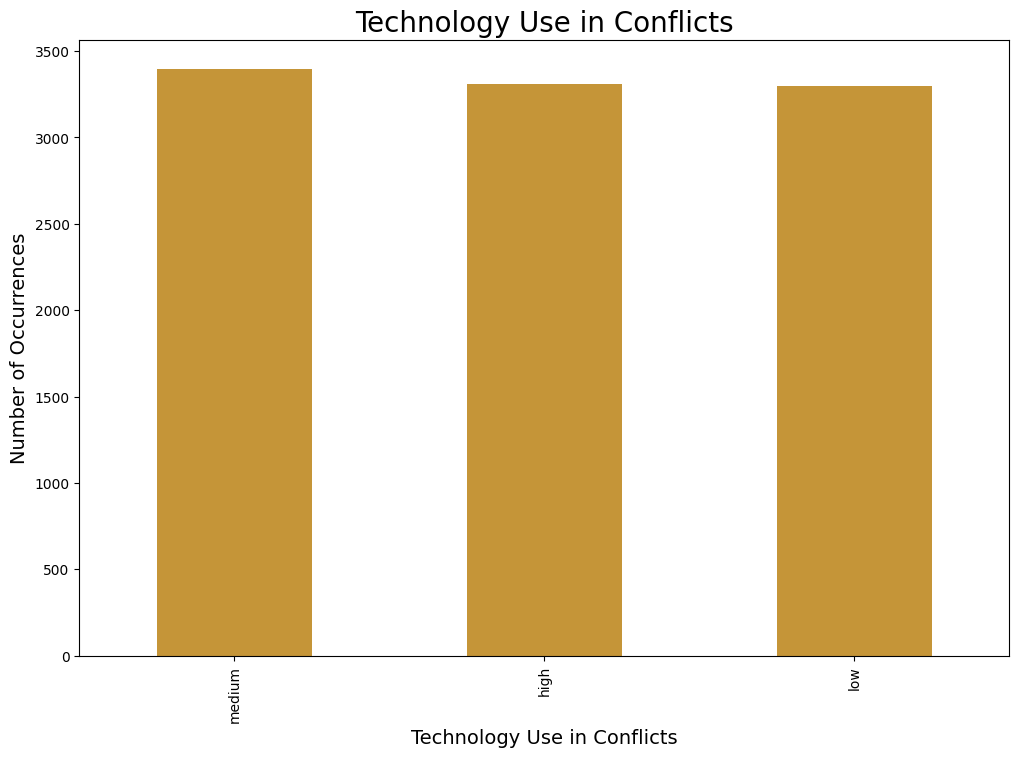

In [24]:
plt.figure(figsize=(12, 8))
df['Technology_Use_in_Conflicts'].value_counts().plot(kind='bar', color='#c59538')
plt.xlabel('Technology Use in Conflicts', size=14)
plt.ylabel('Number of Occurrences', size=14)
plt.title('Technology Use in Conflicts', size=20)
plt.show()
